In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
import copy
import matplotlib.cm as cm
import matplotlib.colors as mcolors

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# target = [x.lower() for x in ['gobp_immune_response', 
#                               'gobp_adaptive_immune_response', 
#                               'gobp_t_cell_activation_involved_in_immune_response', 
#                               'gobp_b_cell_activation_involved_in_immune_response', 
#                               'gobp_natural_killer_cell_activation_involved_in_immune_response', 
#                               'gobp_lymphocyte_activation_involved_in_immune_response',
#                               'gobp_cytokine_production_involved_in_immune_response', 
#                               'gobp_immune_response_regulating_cell_surface_receptor_signaling_pathway', 
#                               'gobp_immune_response_to_tumor_cell', 
#                               'gomf_c_c_chemokine_binding', 
#                               'gomf_cytokine_receptor_activity', 
#                               'kegg_cytokine_cytokine_receptor_interaction', 
#                               'kegg_chemokine_signaling_pathway']]
target = [x.lower() for x in ['gobp_adaptive_immune_response', 
                              'gobp_t_cell_activation_involved_in_immune_response', 
                              'gobp_b_cell_activation_involved_in_immune_response', 
                              'gobp_natural_killer_cell_activation_involved_in_immune_response', 
                              'gobp_lymphocyte_activation_involved_in_immune_response',
                              'gobp_cytokine_production_involved_in_immune_response', 
                              'gobp_immune_response_regulating_cell_surface_receptor_signaling_pathway', 
                              'gobp_immune_response_to_tumor_cell', 
                              'gomf_c_c_chemokine_binding', 
                              'gomf_cytokine_receptor_activity', 
                              'kegg_cytokine_cytokine_receptor_interaction', 
                              'kegg_chemokine_signaling_pathway']]

In [3]:
rna_df = pd.read_csv('../../../data/ICGC-LIRI-JP/clean/ICGC-LIRI-JP_rna_tpm_clean_50_include_normal.csv', sep=',', index_col=0, header=0)
rna_df = rna_df.loc[['KLRB1'], :]
rna_df

,SA594458,SA595555,SA594388,SA594402,SA594445,SA594463,SA594486,SA594546,SA594558,SA594576,SA594724,SA560644,SA594739,SA594801,SA595191,SA595212,SA595217,SA595236,SA595242,SA595251,SA595257,SA595264,SA595276,SA595288,SA595294,SA595301,SA595315,SA595326,SA595329,SA595338,SA595345,SA595355,SA595357,SA595366,SA595371,SA595378,SA595386,SA595388,SA595392,SA595394,SA595398,SA595402,SA595421,SA595432,SA595446,SA560642,SA560673,SA560695,SA560702,SA594207,SA594223,SA560659,SA560984,SA560735,SA560677,SA594269,SA594297,SA594313,SA560675,SA560638,SA594340,SA594358,SA560713,SA594368,SA560636,SA560653,SA594383,SA594397,SA560739,SA561027,SA594414,SA560697,SA594432,SA560741,SA560647,SA560685,SA594500,SA594507,SA594514,SA594531,SA561015,SA560630,SA560667,SA560704,SA560730,SA560628,SA560689,SA560706,SA594586,SA560634,SA594599,SA594611,SA594627,SA560728,SA594647,SA560665,SA594677,SA594692,SA560711,SA560737,SA594777,SA594792,SA560671,SA560693,SA594821,SA595195,SA595204,SA560699,SA595224,SA560719,SA560622,SA560709,SA560670,SA560733,SA560640,SA560668,SA560691,SA560707,SA595282,SA560626,SA560687,SA595353,SA560727,SA560624,SA560663,SA560683,SA560661,SA560972,SA595384,SA595405,SA560681,SA595425,SA560679,SA595428,SA595437,SA595454,SA595462,SA570928,SA560651,SA560715,SA560657,SA560620,SA560721,SA560725,SA560632,SA560701,SA560723,SA561024,SA560717,SA560655,SA560649,SA594564,SA594656,SA594753,SA594785,SA595269,SA595308,SA595385,SA595413,SA595417,SA595441,SA595450,SA595458,SA595464,SA595466,SA595468,SA595470,SA595472,SA595475,SA595477,SA595481,SA595483,SA595485,SA595487,SA595489,SA595491,SA595493,SA595495,SA595497,SA595499,SA595501,SA595503,SA595504,SA595506,SA595508,SA595510,SA595512,SA595514,SA595516,SA595517,SA595519,SA595521,SA595522,SA595524,SA595526,SA595528,SA595530,SA595532,SA595534,SA595537,SA595539,SA595541,SA595545,SA595547,SA595549,SA595551,SA595553,SA595557,SA595559,SA595561,SA595563,SA595564,SA595566,SA595570,SA595571,SA595573,SA595574,SA595576,SA595577,SA595579,SA595581,SA595584,SA595585,SA595587,SA595588,SA595590,SA595598,SA595600,SA595602,SA595606,SA595608,SA560619,SA560621,SA560623,SA560625,SA560627,SA560629,SA560631,SA560633,SA560635,SA560637,SA560639,SA560641,SA560643,SA560645,SA560646,SA560648,SA560650,SA560652,SA560654,SA560656,SA560658,SA560660,SA560662,SA560664,SA560666,SA560669,SA560672,SA560674,SA560676,SA560678,SA560680,SA560682,SA560684,SA560686,SA560688,SA560690,SA560692,SA560694,SA560696,SA560698,SA560703,SA560705,SA560708,SA560710,SA560712,SA560714,SA560718,SA560720,SA560724,SA560726,SA560729,SA560731,SA560732,SA560734,SA560736,SA560738,SA560740,SA560742,SA560960,SA561028,SA570929,SA594209,SA594235,SA594305,SA594317,SA594347,SA594361,SA594375,SA594386,SA594394,SA594398,SA594406,SA594418,SA594436,SA594452,SA594460,SA594473,SA594491,SA594502,SA594512,SA594524,SA594553,SA594561,SA594568,SA594581,SA594593,SA594604,SA594612,SA594631,SA594649,SA594667,SA594686,SA594705,SA594732,SA594744,SA594756,SA594782,SA594789,SA594813,SA595199,SA595207,SA595215,SA595221,SA595226,SA595240,SA595245,SA595254,SA595259,SA595265,SA595284,SA595291,SA595296,SA595305,SA595310,SA595318,SA595327,SA595332,SA595341,SA595350,SA595368,SA595374,SA595380,SA595390,SA595399,SA595408,SA595415,SA595419,SA595423,SA595426,SA595430,SA595435,SA595439,SA595444,SA595448,SA595451,SA595456,SA595459,SA595465,SA595467,SA595469,SA595471,SA595473,SA595476,SA595478,SA595482,SA595484,SA595486,SA595488,SA595490,SA595492,SA595494,SA595496,SA595498,SA595500,SA595502,SA595505,SA595507,SA595509,SA595511,SA595513,SA595515,SA595518,SA595520,SA595523,SA595525,SA595527,SA595529,SA595531,SA595533,SA595536,SA595538,SA595540,SA595542,SA595546,SA595548,SA595550,SA595552,SA595554,SA595556,SA595558,SA595560,SA595562,SA595565,SA595572,SA595575,SA595578,SA595580,SA595582,SA595586,SA595589,SA595601,SA595603,SA595607,SA595611
gene_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [4]:
gsva_file = os.listdir('../../../data/GSVA/ICGC/')
gsva_file

['c2.all.v2023.2.Hs.symbols.gmt.csv',
 'c2.all.v2023.2.Hs.symbols.gmt_corr.csv',
 'c5.all.v2023.2.Hs.symbols.gmt.csv',
 'c5.all.v2023.2.Hs.symbols.gmt_corr.csv',
 'self-defined_genelist.txt.csv']

In [5]:
score_file = list(filter(lambda x: not x.endswith('corr.csv'), gsva_file))
corr_file = list(filter(lambda x: x.endswith('corr.csv'), gsva_file))

In [6]:
score_df = pd.concat([pd.read_csv('../../../data/GSVA/ICGC/' + x, index_col=0, header=0) for x in score_file], axis=0)
score_df = score_df.loc[target, :]
score_df.columns = [x.replace('.', '-') for x in score_df.columns]
score_df

,SA594458,SA595555,SA594388,SA594402,SA594445,SA594463,SA594486,SA594546,SA594558,SA594576,SA594724,SA560644,SA594739,SA594801,SA595191,SA595212,SA595217,SA595236,SA595242,SA595251,SA595257,SA595264,SA595276,SA595288,SA595294,SA595301,SA595315,SA595326,SA595329,SA595338,SA595345,SA595355,SA595357,SA595366,SA595371,SA595378,SA595386,SA595388,SA595392,SA595394,SA595398,SA595402,SA595421,SA595432,SA595446,SA560642,SA560673,SA560695,SA560702,SA594207,SA594223,SA560659,SA560984,SA560735,SA560677,SA594269,SA594297,SA594313,SA560675,SA560638,SA594340,SA594358,SA560713,SA594368,SA560636,SA560653,SA594383,SA594397,SA560739,SA561027,SA594414,SA560697,SA594432,SA560741,SA560647,SA560685,SA594500,SA594507,SA594514,SA594531,SA561015,SA560630,SA560667,SA560704,SA560628,SA560689,SA560706,SA594586,SA560634,SA594599,SA594611,SA594627,SA560728,SA594647,SA560665,SA594677,SA594692,SA560711,SA560737,SA594777,SA594792,SA560671,SA560693,SA594821,SA595195,SA595204,SA560699,SA595224,SA560719,SA560622,SA560709,SA560670,SA560733,SA560640,SA560668,SA560691,SA560707,SA595282,SA560626,SA560687,SA595353,SA560727,SA560624,SA560663,SA560683,SA560661,SA560972,SA595384,SA595405,SA560681,SA595425,SA560679,SA595428,SA595437,SA595454,SA595462,SA570928,SA560651,SA560715,SA560657,SA560620,SA560721,SA560725,SA560632,SA560701,SA560723,SA561024,SA560717,SA560655,SA560649,SA594564,SA594656,SA594753,SA594785,SA595269,SA595308,SA595385,SA595413,SA595417,SA595441,SA595450,SA595458,SA595464,SA595466,SA595468,SA595470,SA595472,SA595475,SA595477,SA595481,SA595483,SA595485,SA595487,SA595489,SA595491,SA595493,SA595495,SA595497,SA595499,SA595501,SA595503,SA595504,SA595506,SA595508,SA595510,SA595512,SA595514,SA595516,SA595517,SA595519,SA595521,SA595522,SA595524,SA595526,SA595528,SA595530,SA595532,SA595534,SA595537,SA595539,SA595541,SA595545,SA595547,SA595549,SA595551,SA595553,SA595557,SA595559,SA595561,SA595563,SA595564,SA595566,SA595570,SA595571,SA595573,SA595574,SA595576,SA595577,SA595579,SA595581,SA595584,SA595585,SA595587,SA595588,SA595590,SA595598,SA595600,SA595602,SA595606,SA595608
gobp_adaptive_immune_response,0.294003,0.435416,-0.263036,-0.308431,-0.099709,0.127851,-0.174252,-0.341598,0.453129,-0.202030,-0.371990,0.287077,0.342150,-0.124380,-0.360850,0.422787,0.090199,0.129454,-0.441131,0.396768,-0.408645,-0.358067,0.473943,0.465769,-0.109373,-0.371781,-0.313356,0.295434,0.270686,-0.333970,0.181234,-0.141208,-0.204181,0.295457,0.269670,0.450445,0.365788,-0.325714,0.303889,0.386993,0.320167,0.543284,0.440201,0.468076,-0.370137,0.169956,-0.189626,0.100235,0.326746,0.396524,-0.335510,-0.354158,-0.222960,0.164856,0.186132,-0.255475,-0.162321,0.329898,0.117817,-0.153296,0.453150,0.175104,-0.218188,-0.128544,-0.296332,-0.278081,-0.246530,-0.269538,-0.133132,-0.344958,0.417355,-0.243443,0.183500,0.524334,0.200024,-0.156650,-0.168766,0.377023,-0.197981,0.387312,0.416374,-0.217398,-0.315703,0.148892,-0.263915,-0.201320,-0.336063,-0.257337,-0.133139,-0.332172,0.547418,-0.316692,-0.273662,-0.362269,-0.415247,-0.359840,-0.369607,0.287588,-0.238410,0.288010,0.303385,0.146279,-0.395305,-0.148190,-0.274880,0.125415,-0.315496,0.239272,-0.357481,-0.396866,-0.112988,0.217188,0.374802,-0.285204,0.302494,0.272927,0.326860,0.237933,0.153490,-0.106481,0.239097,-0.149667,-0.280455,-0.193400,0.140571,-0.164795,-0.282747,0.126566,0.216675,-0.461046,0.460544,0.178833,0.149164,-0.353178,-0.322078,-0.100728,-0.115417,0.512061,0.108501,0.284428,-0.131579,0.211359,0.449072,-0.333102,-0.270830,-0.385011,-0.153760,-0.246569,-0.231926,0.294560,0.146876,0.261486,-0.411372,0.273285,-0.475904,-0.428594,0.509387,-0.334121,0.150888,0.381144,-0.268906,0.169390,-0.337918,0.108956,0.136389,0.428570,-0.236838,-0.162010,0.341241,-0.324955,-0.140225,0.372368,-0.233859,0.457269,0.188753,0.247020,0.470297,0.280214,-0.108948,-0.221037,0.318658,0.380697,-0.314688,0.388404,-0.521342,-0.465993,-0.127183,0.363478,0.360773,0.302037,0.202662,0.407062,-0.235493,-0.279698,0.519737,-0.141324,-0.265635,-0.365321,-0.166446,-0.14

In [7]:
score_df.max().max(), score_df.min().min()

(0.958346532587512, -0.772559601629475)

In [8]:
rna_df = rna_df.loc[:,score_df.columns]
print(rna_df.shape)
rna_df

(1, 230)


,SA594458,SA595555,SA594388,SA594402,SA594445,SA594463,SA594486,SA594546,SA594558,SA594576,SA594724,SA560644,SA594739,SA594801,SA595191,SA595212,SA595217,SA595236,SA595242,SA595251,SA595257,SA595264,SA595276,SA595288,SA595294,SA595301,SA595315,SA595326,SA595329,SA595338,SA595345,SA595355,SA595357,SA595366,SA595371,SA595378,SA595386,SA595388,SA595392,SA595394,SA595398,SA595402,SA595421,SA595432,SA595446,SA560642,SA560673,SA560695,SA560702,SA594207,SA594223,SA560659,SA560984,SA560735,SA560677,SA594269,SA594297,SA594313,SA560675,SA560638,SA594340,SA594358,SA560713,SA594368,SA560636,SA560653,SA594383,SA594397,SA560739,SA561027,SA594414,SA560697,SA594432,SA560741,SA560647,SA560685,SA594500,SA594507,SA594514,SA594531,SA561015,SA560630,SA560667,SA560704,SA560628,SA560689,SA560706,SA594586,SA560634,SA594599,SA594611,SA594627,SA560728,SA594647,SA560665,SA594677,SA594692,SA560711,SA560737,SA594777,SA594792,SA560671,SA560693,SA594821,SA595195,SA595204,SA560699,SA595224,SA560719,SA560622,SA560709,SA560670,SA560733,SA560640,SA560668,SA560691,SA560707,SA595282,SA560626,SA560687,SA595353,SA560727,SA560624,SA560663,SA560683,SA560661,SA560972,SA595384,SA595405,SA560681,SA595425,SA560679,SA595428,SA595437,SA595454,SA595462,SA570928,SA560651,SA560715,SA560657,SA560620,SA560721,SA560725,SA560632,SA560701,SA560723,SA561024,SA560717,SA560655,SA560649,SA594564,SA594656,SA594753,SA594785,SA595269,SA595308,SA595385,SA595413,SA595417,SA595441,SA595450,SA595458,SA595464,SA595466,SA595468,SA595470,SA595472,SA595475,SA595477,SA595481,SA595483,SA595485,SA595487,SA595489,SA595491,SA595493,SA595495,SA595497,SA595499,SA595501,SA595503,SA595504,SA595506,SA595508,SA595510,SA595512,SA595514,SA595516,SA595517,SA595519,SA595521,SA595522,SA595524,SA595526,SA595528,SA595530,SA595532,SA595534,SA595537,SA595539,SA595541,SA595545,SA595547,SA595549,SA595551,SA595553,SA595557,SA595559,SA595561,SA595563,SA595564,SA595566,SA595570,SA595571,SA595573,SA595574,SA595576,SA595577,SA595579,SA595581,SA595584,SA595585,SA595587,SA595588,SA595590,SA595598,SA595600,SA595602,SA595606,SA595608
gene_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KLRB1,6.707438,9.248527,1.529315,0.761446,7.541445,0.221932,2.186987,0.437303,4.213309,6.716415,0.323397,2.196727,4.348929,7.806667,1.884988,24.947355,3.810821,8.457058,1.304057,6.655831,2.618691,0.42374,21.71701,8.90973,1.520818,0.17995,0.451454,4.50155,2.686577,2.393004,5.517301,2.798113,1.513318,3.344436,2.092707,7.076795,5.598584,2.454304,8.152473,6.006376,6.043142,7.838848,5.937817,7.48108,0.864124,4.274647,1.037706,4.811164,3.955616,21.584039,4.386707,0.547499,11.807265,2.353606,12.334759,1.025679,1.347566,15.966185,1.158509,2.270926,5.640306,1.506904,2.053703,12.993204,3.95078,1.873358,4.940572,0.662701,2.373505,0.384633,8.437688,2.485398,3.608654,52.789694,5.457025,5.914809,2.150354,8.998691,1.413707,9.865205,6.410253,12.338036,0.281016,4.61888,2.185169,0.883033,2.626138,0.160406,11.015848,1.954703,7.104946,8.83108,1.894611,6.55061,0.957071,2.200366,2.461425,4.650403,2.042464,2.559444,8.608607,7.385323,1.330255,3.850729,1.217709,2.097769,3.922381,5.132685,1.813163,3.453839,2.537205,5.600811,2.796737,0.538798,11.002325,6.392811,20.597759,5.078234,0.933204,6.006759,6.87137,8.552148,0.608812,8.084574,27.146057,9.346782,5.515607,2.373481,6.139185,0.419185,16.005328,6.563437,5.990989,0.851033,0.594291,6.040126,1.84904,2.345625,11.950361,1.134401,6.442503,1.801209,17.298587,1.155566,1.597182,0.500525,1.015571,2.370347,3.004955,10.585481,3.242588,4.356259,0.568703,4.187052,1.488628,0.222735,9.744495,0.328753,15.081808,7.037981,8.520474,3.736482,1.649935,10.395218,5.039512,5.18778,4.719308,1.444393,11.023441,0.557056,1.026257,26.161421,0.331154,22.76868,7.603981,2.342329,16.00164,24.925533,3.893355,3.373814,3.292748,4.466127,0.618355,20.83104,0.450134,0.514089,2.

In [9]:
score_merge_df = pd.concat([rna_df, score_df], axis=0)
score_merge_df.sort_values(by='KLRB1', axis=1, inplace=True)
score_merge_df.index = [score_merge_df.index[0]] + [x[5:] for x in score_merge_df.index[1:]]
score_merge_df

,SA594586,SA595301,SA595608,SA594463,SA595308,SA560667,SA594724,SA595413,SA595487,SA561027,SA560681,SA595264,SA594546,SA595510,SA595315,SA560723,SA595512,SA595585,SA560640,SA560659,SA595481,SA594753,SA595454,SA560624,SA595506,SA594397,SA595590,SA594402,SA595587,SA595563,SA595437,SA595446,SA560689,SA560626,SA560665,SA595571,SA561024,SA594269,SA595483,SA595524,SA560673,SA595564,SA560657,SA595581,SA560632,SA560675,SA595195,SA595242,SA560693,SA594297,SA595588,SA594514,SA595475,SA595570,SA595269,SA595549,SA594358,SA595357,SA595294,SA594388,SA595577,SA560701,SA595464,SA595598,SA560721,SA560719,SA570928,SA595545,SA560653,SA595191,SA560728,SA594599,SA560737,SA560713,SA595557,SA595371,SA595204,SA594500,SA595566,SA595530,SA560628,SA594486,SA560644,SA594677,SA560638,SA595573,SA595514,SA595493,SA560651,SA560735,SA560717,SA595384,SA560739,SA595338,SA595537,SA595388,SA594692,SA560697,SA560709,SA594777,SA595257,SA560706,SA595329,SA595516,SA560733,SA595355,SA560655,SA594564,SA595503,SA595600,SA595366,SA595501,SA595584,SA560622,SA594432,SA595458,SA595526,SA595217,SA594821,SA595499,SA560699,SA560636,SA560702,SA595539,SA595534,SA594785,SA594558,SA560642,SA594739,SA594656,SA594223,SA595504,SA595326,SA595519,SA595553,SA560704,SA560711,SA595472,SA595517,SA560695,SA595521,SA594383,SA595468,SA595282,SA595559,SA595224,SA595470,SA560647,SA560972,SA595345,SA595528,SA595386,SA560670,SA594340,SA595574,SA560685,SA595421,SA595428,SA595394,SA560687,SA595462,SA595398,SA595561,SA595405,SA595532,SA595579,SA560691,SA561015,SA560620,SA594647,SA560679,SA595251,SA594458,SA594576,SA595353,SA595441,SA595378,SA594611,SA560671,SA595432,SA594445,SA595491,SA594801,SA595402,SA560663,SA595392,SA594414,SA595236,SA595450,SA560727,SA594792,SA594627,SA595288,SA594507,SA595555,SA595551,SA560661,SA595385,SA594531,SA595466,SA560649,SA595606,SA595547,SA560668,SA560634,SA595477,SA595522,SA560984,SA560715,SA560677,SA560630,SA594368,SA595576,SA595417,SA594313,SA595495,SA595425,SA560725,SA595541,SA560707,SA595508,SA594207,SA595276,SA595489,SA595497,SA595212,SA595485,SA560683,SA595602,SA560741
KLRB1,0.160406,0.179950,0.207194,0.221932,0.222735,0.281016,0.323397,0.328753,0.331154,0.384633,0.419185,0.423740,0.437303,0.450134,0.451454,0.500525,0.514089,0.535491,0.538798,0.547499,0.557056,0.568703,0.594291,0.608812,0.618355,0.662701,0.670029,0.761446,0.786271,0.820013,0.851033,0.864124,0.883033,0.933204,0.957071,0.997978,1.015571,1.025679,1.026257,1.036342,1.037706,1.095536,1.134401,1.140420,1.155566,1.158509,1.217709,1.304057,1.330255,1.347566,1.354061,1.413707,1.444393,1.487946,1.488628,1.492955,1.506904,1.513318,1.520818,1.529315,1.575030,1.597182,1.649935,1.769013,1.801209,1.813163,1.849040,1.853572,1.873358,1.884988,1.894611,1.954703,2.042464,2.053703,2.072163,2.092707,2.097769,2.150354,2.155660,2.176930,2.185169,2.186987,2.196727,2.200366,2.270926,2.284364,2.317357,2.342329,2.345625,2.353606,2.370347,2.373481,2.373505,2.393004,2.398874,2.454304,2.461425,2.485398,2.537205,2.559444,2.618691,2.626138,2.686577,2.775564,2.796737,2.798113,3.004955,3.242588,3.292748,3.324297,3.344436,3.373814,3.429300,3.453839,3.608654,3.736482,3.749358,3.810821,3.850729,3.893355,3.922381,3.950780,3.955616,4.078912,4.158411,4.187052,4.213309,4.274647,4.348929,4.356259,4.386707,4.466127,4.501550,4.584442,4.588557,4.618880,4.650403,4.719308,4.807048,4.811164,4.935951,4.940572,5.039512,5.078234,5.126566,5.132685,5.187780,5.457025,5.515607,5.517301,5.533595,5.598584,5.600811,5.640306,5.690075,5.914809,5.937817,5.990989,6.006376,6.006759,6.040126,6.043142,6.124793,6.139185,6.237477,6.242301,6.392811,6.410253,6.442503,6.550610,6.563437,6.655831,6.707438,6.716415,6.871370,7.037981,7.076795,7.104946,7.385323,7.481080,7.541445,7.603981,7.806667,7.838848,8.084574,8.152473,8.437688,8.457058,8.520474,8.552148,8.608607,8.831080,8.909730,8.998691,9.248527,9.300547,9.346782,9.744495,9.865205,10.395218,10.585481,10.686546,10.767630,11.002325,11.015848,11.023441,11.795039,11.807265,11.950361,12.334759,12.338036,12.993204,13

In [11]:
if not os.path.exists('../../../data/GSVA_plot'):
    os.makedirs('../../../data/GSVA_plot')

score_merge_df.to_csv('../../../data/GSVA_plot/ICGC-LIRI-JP_GSVA_all_score.csv')

In [12]:
corr_df = pd.concat([pd.read_csv('../../../data/GSVA/ICGC/' + x, index_col=0, header=0) for x in corr_file], axis=0)
corr_df = corr_df.loc[target, :]
corr_df.columns = [x.replace('.', '_') for x in corr_df.columns]
corr_df['-log10(P)'] = -np.log10(corr_df['pvalue'])
corr_df.to_csv('../../../data/GSVA_plot/ICGC-LIRI-JP_GSVA_all_corr.csv')
corr_df

,cor,pvalue,-log10(P)
gobp_adaptive_immune_response,0.631515,5.328183e-27,26.273421
gobp_t_cell_activation_involved_in_immune_response,0.642319,3.739218e-28,27.427219
gobp_b_cell_activation_involved_in_immune_response,0.507954,1.723095e-16,15.763691
gobp_natural_killer_cell_activation_involved_in_immune_response,0.539599,8.870326e-19,18.052060
gobp_lymphocyte_activation_involved_in_immune_response,0.648014,8.825748e-29,28.054248
gobp_cytokine_production_involved_in_immune_response,0.582038,2.980378e-22,21.525729
gobp_immune_response_regulating_cell_surface_receptor_signaling_pathway,0.666096,7.299582e-31,30.136702
gobp_immune_response_to_tumor_cell,0.470098,4.782263e-14,13.320367
gomf_c_c_chemokine_binding,0.656086,1.080832e-29,28.966242
gomf_cytokine_receptor_activity,0.569591,3.509214e-21,20.454790


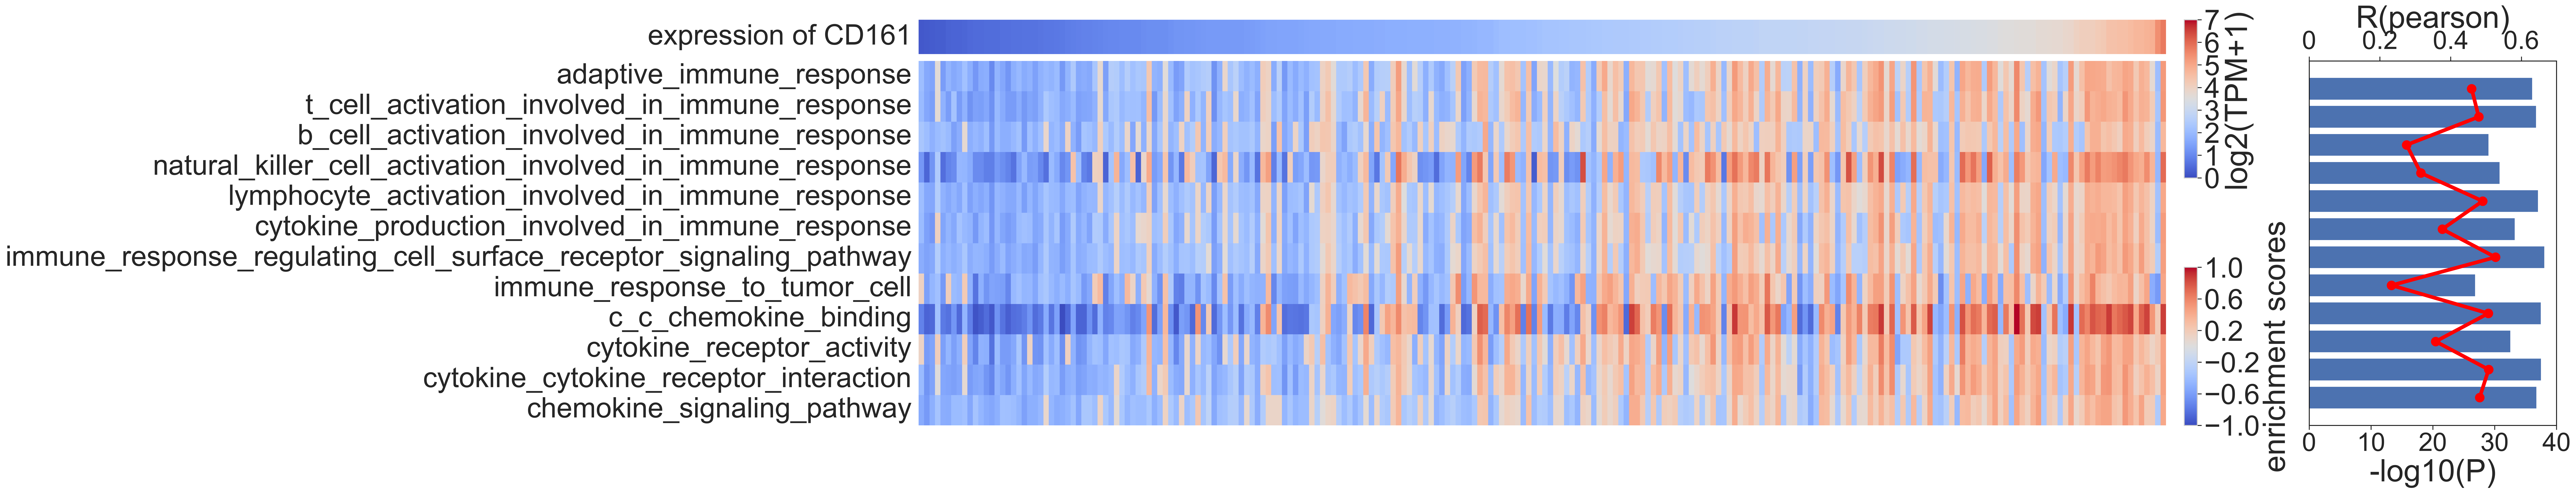

In [13]:
fig = plt.figure(figsize=(40, 12), dpi=300)

grid = plt.GridSpec(12,105)
sns.set_theme(style="whitegrid",font_scale=3.5)

# CD161
plt.subplot(grid[2,:80])
# sns.heatmap(score_merge_df.iloc[0:1, :], cmap='coolwarm', xticklabels='', yticklabels='',center=4, vmin=0, vmax=10)
h1 = sns.heatmap(np.log2(score_merge_df.iloc[0:1, :] + 1), cmap='coolwarm', xticklabels='', yticklabels=['expression of CD161'], vmin=0, vmax=7, cbar=False)
plt.yticks(rotation=0)

axc1 = plt.subplot(grid[2:6,81:82])
cmap1 = copy.copy(cm.coolwarm)
norm1 = mcolors.Normalize(vmin=0, vmax=7)
im1 = cm.ScalarMappable(norm=norm1, cmap=cmap1)
cbar1 = fig.colorbar(
    im1, cax=axc1, orientation='vertical',
    ticks=np.linspace(0, 7, 8),
    label='log2(TPM+1)'
)
axc1.grid(False)

# enrichment scores
plt.subplot(grid[3:,:80])
# sns.heatmap(score_merge_df.iloc[1:, :], cmap='coolwarm', xticklabels='', yticklabels=[x[5:] for x in score_merge_df.index[1:]])
h2 = sns.heatmap(score_merge_df.iloc[1:, :], cmap='coolwarm', xticklabels='', yticklabels=score_merge_df.index[1:], cbar=False)

axc2 = plt.subplot(grid[8:,81:82])
cmap2 = copy.copy(cm.coolwarm)
norm2 = mcolors.Normalize(vmin=-1, vmax=1)
im2 = cm.ScalarMappable(norm=norm2, cmap=cmap2)
cbar2 = fig.colorbar(
    im2, cax=axc2, orientation='vertical',
    ticks=np.linspace(-1, 1, 6),
    label='enrichment scores'
)
axc2.grid(False)

# pearson
ax1 = plt.subplot(grid[3:, 89:], label="1")
ax1.barh(range(corr_df.shape[0], 0, -1), width=corr_df['cor'])
ax1.set_xticks([0,0.2,0.4,0.6])
ax1.set_xticklabels([0,0.2,0.4,0.6], fontdict={'fontsize':35})
ax1.set_yticks([])
ax1.spines['top'].set_color('k')
ax1.spines['bottom'].set_color('k')
ax1.spines['left'].set_color('k')
ax1.spines['right'].set_color('k')
ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_text('R(pearson)')
ax1.xaxis.set_label_position('top')
ax1.grid(False)

# -log10(P)
ax2 = fig.add_subplot(grid[3:, 89:], label="2", frame_on=False, sharey=ax1)
ax2.plot(corr_df['-log10(P)'], range(corr_df.shape[0], 0, -1), 'o-', color='red', linewidth=5, markersize=12)
# ax2.spines['left'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.set_xticks(range(0, 50, 10))
ax2.set_xticklabels(range(0, 50, 10), fontdict={'fontsize':35})
ax2.set_yticks([])
ax2.set_xlabel('-log10(P)')
ax2.grid(False)

plt.savefig("../../../data/GSVA_plot/ICGC-LIRI-JP_GSVA_plot.pdf", bbox_inches = 'tight')
plt.savefig("../../../data/GSVA_plot/ICGC-LIRI-JP_GSVA_plot.png", dpi=300, bbox_inches = 'tight')
plt.show()